In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

# check if xgb is installed, then import
try:
    import xgboost as xgb
except Exception as e:
    print(f"XGBoost may not be installed, or has an issue. Error: {e}")

XGBoost may not be installed, or has an issue. Error: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/lucasrosenblatt/opt/miniconda3/envs/fairly_uncertain/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B22D7F05-77FA-34A6-8757-C605D2CFE1AD> /Users/lucasrosenblatt/opt/miniconda3/envs/fairly_uncertain/lib/python3.10/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (mach-o file, but is an incompatible architecture (have 'arm64', need 'x86_64')), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.d

In [4]:
file_path = "filtered_cleaned_we_survey_data_2023.csv"
df = pd.read_csv(file_path)

print(list(df.columns))

['how_long_have_you_worked_for_your_current_employer', 'which_of_the_following_groups_best_describes_your_employment_level', 'which_of_the_following_groups_best_describes_the_organization_that_you_work_for', 'flexible_working_arrangements', 'culturalreligious_practices', "approximately_what_is_the_size_of_your_employer's_workforce", 'i_believe_i_am_being_paid_fairly_for_the_work_that_i_do', 'family_commitments', 'yes_one_or_more_children', 'leadership_opportunities', 'black', 'white', 'asian', 'latinaeox', 'recognition_from_colleaguespeers', 'what_country_do_you_currently_live_in', 'is_your_first_language_the_primary_language_of_your_workplace_', 'socialize_with_peers_within_my_company', 'i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description', 'i_avoid_discussions_about_salary_and_incentives', 'i_advocate_for_myself_when_appropriate_so_that_my_manager_knows_what_i_want_and_expect', 'i_trust_that_i_am_compensated_appropriately_for_my_accomplish

1400

classification report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       301
           1       0.50      0.45      0.48       119

    accuracy                           0.72       420
   macro avg       0.65      0.64      0.64       420
weighted avg       0.71      0.72      0.71       420


top features:
which_of_the_following_groups_best_describes_your_employment_level                                   0.112615
approximately_what_is_the_size_of_your_employer's_workforce                                          0.082840
i_pursue_job_opportunities_even_if_i_do_not_fulfill_all_of_the_requirements_on_a_job_description     0.077497
which_of_the_following_groups_best_describes_the_organization_that_you_work_for                      0.067072
leadership_opportunities                                                                             0.062692
i_let_my_manager_know_what_i_want_with_the_expectation_that_it_will_generate_gr

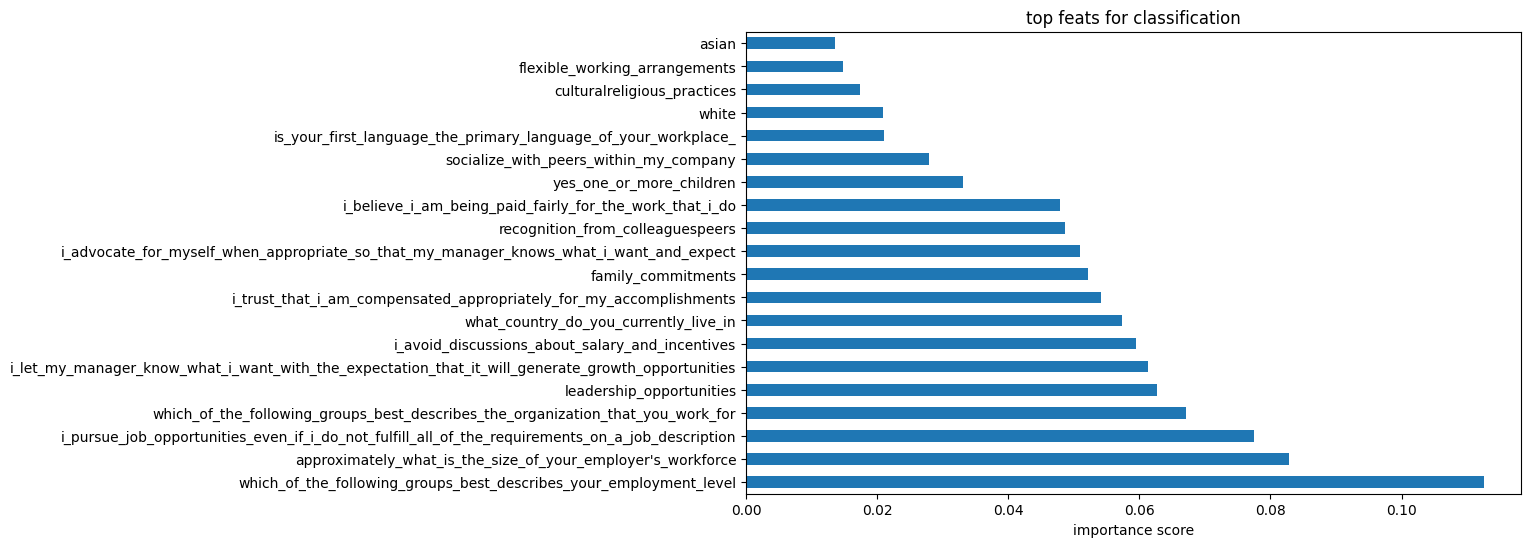

In [5]:
# "how_long_have_you_worked_for_your_current_employer?"
# 1       Less than 1 year 10%
# 2       1 to 5 years 37%
# 3       6 to 10 years 20%
# 4       11 to 20 years 21%
# 5       21 years or more 10%
# 0       (missing, ignore these)

# recode to
# <= 10 years 0
# > 10 years 1

target = "how_long_have_you_worked_for_your_current_employer"

if target not in df.columns:
    print(f"target column '{target}' not found in selected features.")
else:
    # drop rows where target is 0
    df = df[df[target] != 0]

    df_classification = df.dropna(subset=[target])
    X = df_classification.drop(columns=[target])
    y = df_classification[target]

    print(len(X))

    # adjust y so that 0 or 1 -> 0, and 2,3,4 -> 1
    y = y.apply(lambda x: 0 if x in [0, 1, 2, 3] else 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    if 'xgboost' in globals():
        clf = xgb.XGBClassifier(random_state=42)
        clf.fit(X_train, y_train)
    else:
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("\nclassification report:")
    print(classification_report(y_test, y_pred))

    feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\ntop features:")
    print(feature_importances.head(50))

    plt.figure(figsize=(10, 6))
    feature_importances.head(20).plot(kind='barh')
    plt.title("top feats for classification")
    plt.xlabel("importance score")
    plt.show()
